# Potato chips purchasing behaviour analysis

Step 1: Data processing/cleaning

In [2]:
import pandas as pd
import datetime as dt
import re
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')
transaction= pd.read_csv('QVI_transaction_data.csv')

Processing file: QVI_purchase_behaviour.csv

In [3]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
purchase_behaviour['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [5]:
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [6]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Customer data is looking good, no null values.
<br>
Processing file: QVI_transaction_data.csv

In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
#confirming that transaction with multiple types of chips are separated in different rows.
transaction['TXN_ID'].duplicated().value_counts()

False    263127
True       1709
Name: TXN_ID, dtype: int64

In [10]:
excel_serial_date = dt.datetime(1899,12,30)
transaction['CONVERTED_DATE'] = pd.to_timedelta(transaction['DATE'], 
                                                unit='days') +excel_serial_date


In [11]:
transaction['DATE'] = transaction['CONVERTED_DATE']

In [12]:
transaction.drop(columns='CONVERTED_DATE', inplace=True)

In [13]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


Create new column for weight/size of the chips package.

In [14]:
transaction['PROD_WEIGHT_G'] = transaction['PROD_NAME'].str.extract('(\d+)').astype(int)

In [15]:
transaction.head() #checking the new column for package size

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


Need to clean PROD_NAME column, remove all special charaters.

In [16]:
transaction['PROD_NAME'] = transaction['PROD_NAME'].map(lambda x: re.sub(r'[^a-zA-Z0-9]',' ', x)).map(lambda x:re.sub(r'\d+\w+', '', x))
transaction.head(10) #check to ensure its removed


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream Chives,2,7.2,210


In [17]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   PROD_WEIGHT_G   264836 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(1)
memory usage: 17.2+ MB


Frequency table of top 20 most frequent words in 'PROD_NAME' column

In [127]:
word_frequency = pd.Series(" ".join(transaction['PROD_NAME']).lower().split()).value_counts()
top_20_word = pd.DataFrame(word_frequency[:20], columns = ['Frequency']).reset_index().rename(columns={'index':'Name'})
top_20_word 

,Name,Frequency
0,chips,49770
1,kettle,41288
2,salt,27976
3,cheese,27890
4,smiths,27390
5,pringles,25102
6,crinkle,22490
7,corn,22061
8,doritos,22041
9,original,21560


Drop all the rows containing 'Salsa'

In [19]:
transaction = transaction[~transaction['PROD_NAME'].str.contains('salsa', case=False)]
transaction.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   PROD_WEIGHT_G   246742 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(1)
memory usage: 17.9+ MB


Check for outliers =]

In [20]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_WEIGHT_G
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,175.585178
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,59.434727
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


In [21]:
transaction.sort_values(by='PROD_QTY', ascending = False)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps,5,18.5,134
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips,5,9.5,160
69502,2018-08-18,55,55144,49328,44,Thins Chips Light Tangy,5,16.5,175
...,...,...,...,...,...,...,...,...,...
150883,2018-08-14,184,184055,186586,107,Smiths Crinkle Cut French OnionDip,1,2.6,150
150885,2019-05-17,184,184152,187227,28,Thins Potato Chips Hot Spicy,1,3.3,175
29682,2018-12-04,174,174004,174974,114,Kettle Sensations Siracha Lime,1,4.6,150
150887,2019-05-17,184,184205,187584,13,Red Rock Deli Thai Chilli Lime,1,2.7,150


Quantity of 200 packs of chips should be deleted, as the extreme value may affect the analysis and it does not represent a regular customer.

In [22]:
transaction = transaction[transaction['LYLTY_CARD_NBR']!= 226000]

Delete transaction for Loyaly Card Number 226000

In [23]:
transaction.sort_values(by='PROD_QTY', ascending = False) #confirm it has been deleted

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G
80732,2019-05-18,49,49309,45816,30,Doritos Corn Chips Cheese Supreme,5,22.0,170
17145,2018-08-16,202,202289,202104,42,Doritos Corn Chip Mexican Jalapeno,5,19.5,150
117547,2019-05-19,81,81120,80285,46,Kettle Original,5,27.0,175
99458,2018-08-17,138,138085,141016,40,Thins Chips Seasonedchicken,5,16.5,175
28135,2018-08-20,51,51263,46961,3,Kettle Sensations Camembert Fig,5,23.0,150
...,...,...,...,...,...,...,...,...,...
150883,2018-08-14,184,184055,186586,107,Smiths Crinkle Cut French OnionDip,1,2.6,150
150885,2019-05-17,184,184152,187227,28,Thins Potato Chips Hot Spicy,1,3.3,175
29682,2018-12-04,174,174004,174974,114,Kettle Sensations Siracha Lime,1,4.6,150
150887,2019-05-17,184,184205,187584,13,Red Rock Deli Thai Chilli Lime,1,2.7,150


In [24]:
transaction['DATE'].nunique()

364

In [25]:
no_transaction = transaction.groupby('DATE').size()

In [26]:
missing_date = pd.date_range(start='2018-07-01', end='2019-06-30').difference(transaction['DATE'])

In [27]:
missing_date

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The missing date is on Christmas day, the store is likley to be closed on that date. 

In [28]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [29]:
table = pd.pivot_table(transaction, index='DATE', values=['TOT_SALES'], aggfunc='sum')

In [30]:
table['NO_transaction'] = no_transaction

In [31]:
table

,TOT_SALES,NO_transaction
DATE,,
2018-07-01,4920.1,663
2018-07-02,4877.0,650
2018-07-03,4954.7,674
2018-07-04,4968.1,669
2018-07-05,4682.0,660
...,...,...
2019-06-26,4829.7,657
2019-06-27,4941.3,669
2019-06-28,4876.6,673


In [32]:
complete_days = pd.DataFrame(index= pd.date_range(start='2018-07-01', end='2019-06-30'))

In [33]:
complete_days 

""
2018-07-01
2018-07-02
2018-07-03
2018-07-04
2018-07-05
...
2019-06-26
2019-06-27
2019-06-28
2019-06-29


In [34]:
combine = pd.concat([table,complete_days],axis=1)

In [35]:
combine.fillna(value=0, inplace=True)

Now the missing date is filled with value 0, we are ready to plot some graphs.

In [36]:
import seaborn as sns

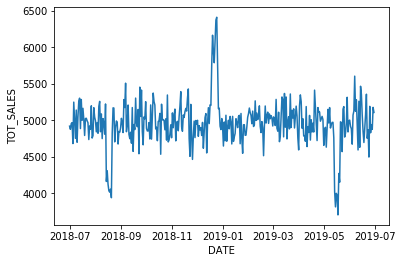

In [37]:
sns.lineplot(data=table, x=table.index, y='TOT_SALES')

In [41]:
import matplotlib.pylab as plt

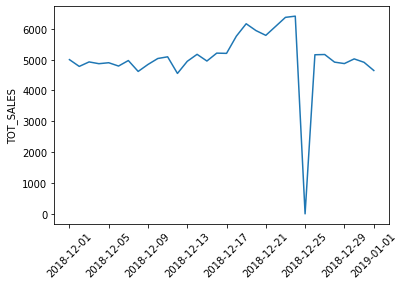

In [42]:
december_sales = sns.lineplot(data=combine, x=pd.date_range(start='2018-12-01', end='2019-01-01'), 
             y=combine.loc['2018-12-01':'2019-01-01','TOT_SALES'])
plt.xticks(rotation=45);


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

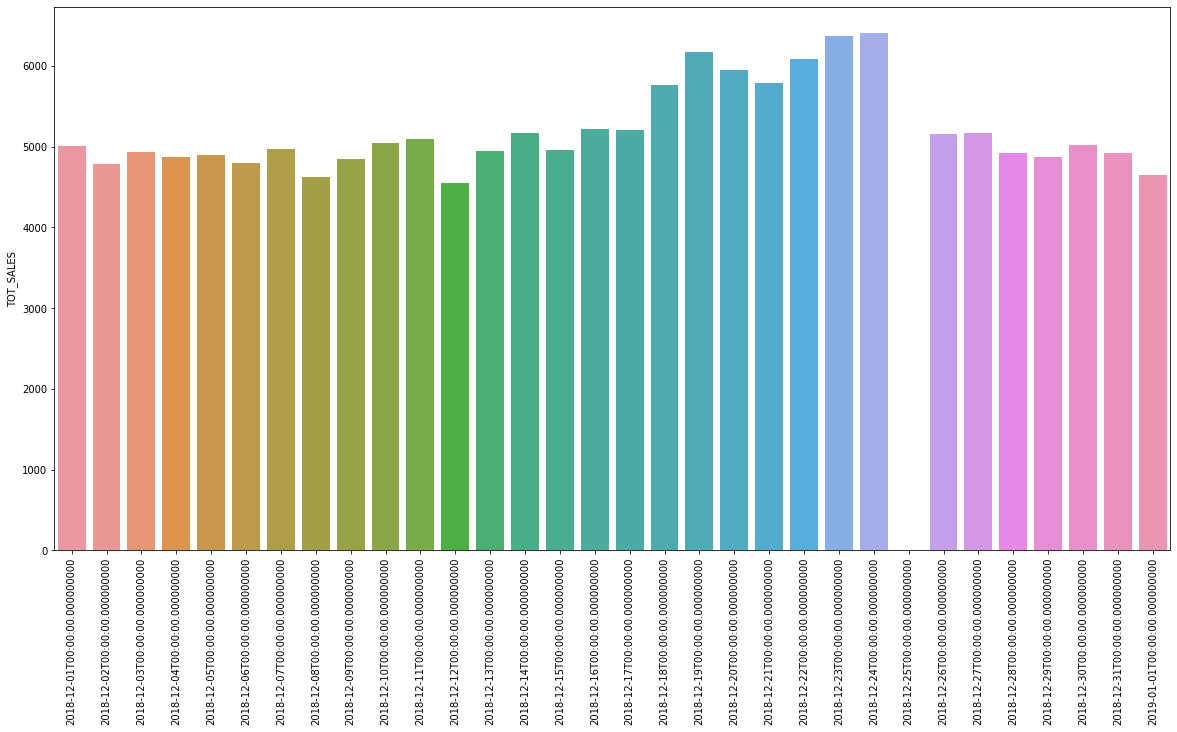

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(data=combine, x=pd.date_range(start='2018-12-01', end='2019-01-01'), 
             y=combine.loc['2018-12-01':'2019-01-01','TOT_SALES'])
plt.xticks(rotation=90)

Above graph showing total sales for each day of December.

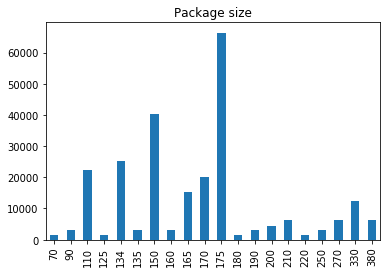

In [44]:
transaction['PROD_WEIGHT_G'].value_counts().sort_index().plot(kind='bar', title='Package size')


In [45]:
transaction['PROD_WEIGHT_G'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70])

Most popular package size is 175g. Very low demand on package size greater than 200g or less than 110g.

In [46]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [47]:
transaction['BRAND'] = transaction['PROD_NAME'].str.split().str[0] #extracting the brand name and creating a new column

In [48]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


Created a new column for Brand names.

In [49]:
transaction['BRAND'].unique() #clean up any duplicate names

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [50]:
brand_replacements = {'Snbts':'Sunbites','WW':'Woolworths','Infzns':'Infuzions','Dorito':'Doritos', 'RED':'Red'}
transaction['BRAND'] = transaction['BRAND'].replace(brand_replacements)

In [51]:
transaction['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'Smith', 'GrnWves', 'Tyrrells',
       'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos', 'Sunbites'],
      dtype=object)

Brand names are now looking good, no duplicates.
<br>
Will perform some simple analysis on customer segments.

In [52]:
purchase_behaviour['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [53]:
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [130]:
customer_segment = purchase_behaviour.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().sort_values(ascending=False).reset_index()
customer_segment

,LIFESTAGE,PREMIUM_CUSTOMER,0
0,YOUNG SINGLES/COUPLES,Mainstream,8088
1,RETIREES,Mainstream,6479
2,OLDER SINGLES/COUPLES,Mainstream,4930
3,OLDER SINGLES/COUPLES,Budget,4929
4,OLDER SINGLES/COUPLES,Premium,4750
5,OLDER FAMILIES,Budget,4675
6,RETIREES,Budget,4454
7,YOUNG FAMILIES,Budget,4017
8,RETIREES,Premium,3872
9,YOUNG SINGLES/COUPLES,Budget,3779


In [132]:
YOUNG_SINGLE_COUPLES_MAINSTREAM_PERCT = (customer_segment.iloc[0,2]/customer_segment.iloc[:,2].sum())*100
YOUNG_SINGLE_COUPLES_MAINSTREAM_PERCT #percentage of Young singles/couples mainstream customer segment

11.134821096686261

Young singles/couples mainstream customer segment consist highest number of customers. 11% across the total 21 customer segments.

In [93]:
customer_segment_table = customer_segment.pivot_table(values=0,index='LIFESTAGE', columns='PREMIUM_CUSTOMER')
customer_segment_table

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


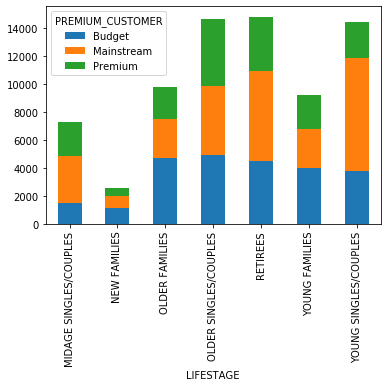

In [94]:
customer_segment_table[['Budget', 'Mainstream', 'Premium']].plot(kind="bar",stacked=True)

* Retirees segment has the most customer, follow-by Older Singles/Couples. 
<br>
* Majority customer in Young Singles/Couples segment falls under Mainstream catergory.


# Both datasets are looking good and ready to be merged

In [57]:
purchase_behaviour.shape
    

(72637, 3)

In [58]:
transaction.shape

(246740, 10)

In [59]:
combined = pd.merge(transaction,purchase_behaviour)
combined.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [60]:
combined.shape

(246740, 12)

Number of rows for combined data remains 246739.
<br>
Now we will check for any NaN values.

In [61]:
combined['LIFESTAGE'].isnull().value_counts()

False    246740
Name: LIFESTAGE, dtype: int64

No NaN values, therefore can confirm all transactions had a matched customer.
<br>
Before analysing the combined data, lets save it for stage 2.

In [62]:
combined.to_csv('combined_dataset.csv')

Questions we are interest:
* Total sales in each customer segment
* How many chips are bought per customer by segment
* What's the average chip price by customer segment

In [63]:
combined.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              156863.75
YOUNG SINGLES/COUPLES   Mainstream          147582.20
RETIREES                Mainstream          145168.95
YOUNG FAMILIES          Budget              129717.95
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
OLDER FAMILIES          Mainstream           96413.55
RETIREES                Premium              91296.65
YOUNG FAMILIES          Mainstream           86338.25
MIDAGE SINGLES/COUPLES  Mainstream           84734.25
YOUNG FAMILIES          Premium              78571.70
OLDER FAMILIES          Premium              75242.60
YOUNG SINGLES/COUPLES   Budget               57122.10
MIDAGE SINGLES/COUPLES  Premium              54443.85
YOUNG SINGLES/COUPLES   Premium              39052.30
MIDAGE SINGLES/COUPLES  Budget           

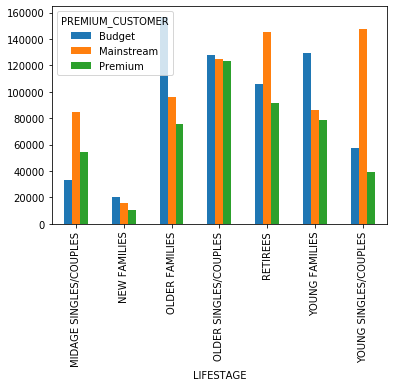

In [122]:
combined.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack().plot(kind='bar')

Text(0.5, 0, 'TOTAL SALES')

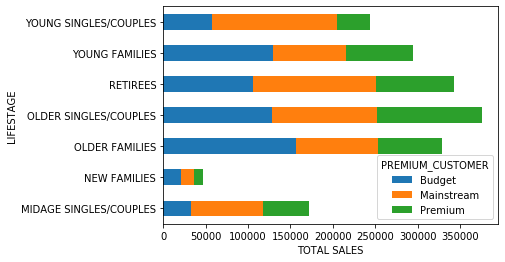

In [121]:
combined.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack().plot(kind='barh', stacked=True)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")

Customers in the 4 segments below contributed to the most sales;
* Older Families-budget
* Retirees-Mainstream
* Young Singles/couples-Mainstream
* Young Families-budget 
<br>
Why? Possibly because there are more customers in these segments? Lets take a look

In [104]:
combined.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          7917
RETIREES                Mainstream          6358
OLDER SINGLES/COUPLES   Mainstream          4858
                        Budget              4849
                        Premium             4682
OLDER FAMILIES          Budget              4611
RETIREES                Budget              4385
YOUNG FAMILIES          Budget              3953
RETIREES                Premium             3812
YOUNG SINGLES/COUPLES   Budget              3647
MIDAGE SINGLES/COUPLES  Mainstream          3298
OLDER FAMILIES          Mainstream          2788
YOUNG FAMILIES          Mainstream          2685
YOUNG SINGLES/COUPLES   Premium             2480
YOUNG FAMILIES          Premium             2398
MIDAGE SINGLES/COUPLES  Premium             2369
OLDER FAMILIES          Premium             2231
MIDAGE SINGLES/COUPLES  Budget              1474
NEW FAMILIES            Budget              1087
                        Main

Young singles/couples mainstream segment has highest number of customers.
<br>
Lets explore other possible reasons in contribution to the high total sales in older families budget segment. 
<br>
Explore the following:
* Quantity
* Price

Lets first explore average package of chips bought per customer.

In [66]:
combined.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].mean().sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          1.948795
                        Premium             1.945496
                        Budget              1.945384
YOUNG FAMILIES          Mainstream          1.941408
                        Budget              1.941226
                        Premium             1.938149
OLDER SINGLES/COUPLES   Budget              1.914920
                        Premium             1.913949
MIDAGE SINGLES/COUPLES  Mainstream          1.911942
OLDER SINGLES/COUPLES   Mainstream          1.911201
RETIREES                Premium             1.901438
MIDAGE SINGLES/COUPLES  Budget              1.893626
RETIREES                Budget              1.893286
MIDAGE SINGLES/COUPLES  Premium             1.891750
RETIREES                Mainstream          1.886680
NEW FAMILIES            Premium             1.860887
                        Mainstream          1.858124
                        Budget              1.855878
YOUNG

Older Families and Young Familes purchase more package of chips per transaction on average.

In [67]:
combined['COST_PER_UNIT'] = combined['TOT_SALES']/combined['PROD_QTY'] #create new column for cost per package 

In [68]:
combined.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['COST_PER_UNIT'].mean().sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.065642
MIDAGE SINGLES/COUPLES  Mainstream          3.994241
RETIREES                Budget              3.924404
                        Premium             3.920942
NEW FAMILIES            Budget              3.917688
                        Mainstream          3.916133
OLDER SINGLES/COUPLES   Premium             3.893182
                        Budget              3.882096
NEW FAMILIES            Premium             3.872110
RETIREES                Mainstream          3.844294
OLDER SINGLES/COUPLES   Mainstream          3.814665
MIDAGE SINGLES/COUPLES  Premium             3.770698
YOUNG FAMILIES          Premium             3.762150
                        Budget              3.760737
OLDER FAMILIES          Budget              3.745340
MIDAGE SINGLES/COUPLES  Budget              3.743328
OLDER FAMILIES          Mainstream          3.737077
YOUNG FAMILIES          Mainstream          3.724533
OLDER

Young and midage singles/couples in mainstream segment are willing to spend more on per package of chips. Interestly young singles/couples customer in premium and budget segment spends the least in comparision. 

In [69]:
combined.groupby(['PREMIUM_CUSTOMER'])['COST_PER_UNIT'].mean().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    3.873657
Premium       3.813059
Budget        3.801726
Name: COST_PER_UNIT, dtype: float64

Customers in premium segment in general spends less on per package of chips.  

In [70]:
combined.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,COST_PER_UNIT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [82]:
mainstream = combined.loc[(combined['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                          ((combined['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (combined['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')), 
                          'COST_PER_UNIT']
mainstream_avg = mainstream.mean()
mainstream_avg

4.039785893795137

In [83]:
premium_budget = combined.loc[((combined['PREMIUM_CUSTOMER']=='Budget')|(combined['PREMIUM_CUSTOMER']=='Premium'))&
                                 ((combined['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (combined['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')),
                                 'COST_PER_UNIT']
premium_budget_avg = premium_budget.mean()
premium_budget_avg

3.706491319963857

The average price spend on per package for Young and Midage singles/couples customer in mainstream segment is $4.04

<br>
The average price spend on per package for Young and Midage singles/couples customer in Premium and Budget segment is $3.70.
<br>
<br>
Lets use t-test to confirm if the difference is significant. 


In [78]:
from scipy.stats import ttest_ind

In [84]:
ttest_ind(mainstream,premium_budget)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

The p value is less than 0.05, therefore we can conclude that the difference between means are significant, Young and Midage singles/couples customer in mainstream segment is willing to spend more on per package base.

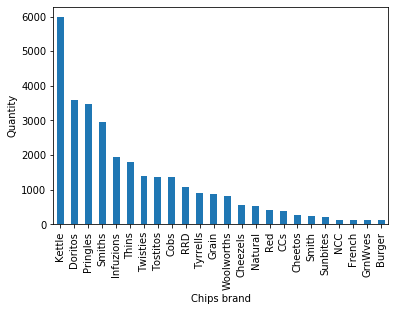

In [125]:
combined.loc[(combined['PREMIUM_CUSTOMER']=='Mainstream') & 
             ((combined['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(combined['LIFESTAGE']== 'MIDAGE SINGLES/COUPLES')),
            'BRAND'].value_counts().plot(kind='bar')
plt.xlabel('Chips brand')
plt.ylabel('Quantity');

Kettle chips are the most popular among these 2 customer segments.

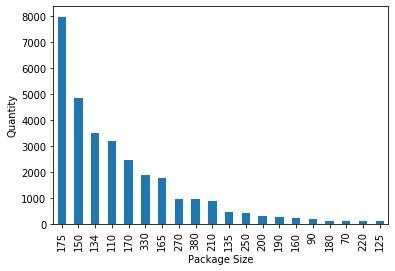

In [136]:
combined.loc[(combined['PREMIUM_CUSTOMER']=='Mainstream') & 
             ((combined['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(combined['LIFESTAGE']== 'MIDAGE SINGLES/COUPLES')),
            'PROD_WEIGHT_G'].value_counts().plot(kind='bar')
plt.xlabel('Package Size')
plt.ylabel('Quantity');

Package size of 175g is the most popular size among these 2 customer segments. 

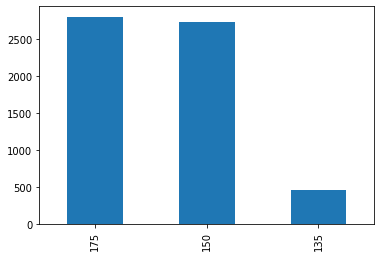

In [139]:
combined.loc[(combined['PREMIUM_CUSTOMER']=='Mainstream') & 
             ((combined['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(combined['LIFESTAGE']== 'MIDAGE SINGLES/COUPLES')) &
             (combined['BRAND']=='Kettle'), 'PROD_WEIGHT_G'].value_counts().plot(kind='bar')

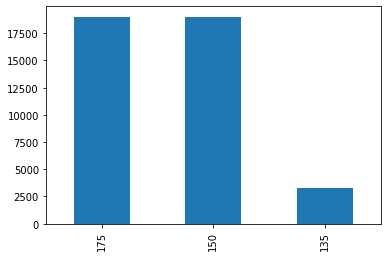

In [140]:
combined[combined['BRAND']=='Kettle']['PROD_WEIGHT_G'].value_counts().plot(kind='bar')

The package size for brand 'Kettle' is 175g & 150g, this might be the reason why 175g is in high demand, as kettle is the most popular chips brand.